## Experiments September

In [3]:
%matplotlib inline
import numpy
import pandas
import pickle

from sklearn import metrics

In [4]:
import seaborn
seaborn.set_style('white')

In [5]:
def get_auc_roc_curve(true, predicted):
    results = []
    ignored_sequences = 0
    for true_sequence, predicted_sequence in zip(true, predicted):
        try:
            results.append([metrics.roc_auc_score(true_sequence, predicted_sequence),
                            true_sequence.shape[0]])
        except ValueError:
            ignored_sequences += 1
    print '{} sequences with only one class, ignoring.'.format(ignored_sequences)
    return pandas.DataFrame(results, columns=['AUC', 'Sequence lenght'])

def get_mean_auc_roc_curve(true, predicted):
    all_true = numpy.concatenate(true)
    all_predicted = numpy.concatenate(predicted)
    return metrics.roc_auc_score(all_true, all_predicted)

In [6]:
def get_rmse(true, predicted):
    results = []
    for true_sequence, predicted_sequence in zip(true, predicted):
        results.append([metrics.mean_squared_error(true_sequence, predicted_sequence)**0.5,
                        true_sequence.shape[0]])
    return pandas.DataFrame(results, columns=['RMSE', 'Sequence lenght'])

def get_mean_rmse(true, predicted):
    all_true = numpy.concatenate(true)
    all_predicted = numpy.concatenate(predicted)
    return metrics.mean_squared_error(all_true, all_predicted)**0.5

In [7]:
def get_r2(true, predicted):
    results = []
    for true_sequence, predicted_sequence in zip(true, predicted):
        results.append([metrics.r2_score(true_sequence, predicted_sequence),
                        true_sequence.shape[0]])
    return pandas.DataFrame(results, columns=['R2', 'Sequence lenght'])

def get_mean_r2(true, predicted):
    all_true = numpy.concatenate(true)
    all_predicted = numpy.concatenate(predicted)
    return metrics.r2_score(all_true, all_predicted)

In [8]:
def get_all_metrics(true, predicted):
    results = []
    ignored_sequences = 0
    for true_sequence, predicted_sequence in zip(true, predicted):
        results.append([true_sequence.shape[0]])
        try:
            results[-1].append(metrics.roc_auc_score(true_sequence, predicted_sequence))
        except ValueError:
            ignored_sequences += 1
            results[-1].append(numpy.nan)
        results[-1].append(metrics.mean_squared_error(true_sequence, predicted_sequence)**0.5)
        results[-1].append(metrics.average_precision_score(true_sequence, predicted_sequence))
        results[-1].append(metrics.accuracy_score(true_sequence, numpy.where(predicted_sequence > 0.5, 1, 0)))
        results[-1].append(metrics.r2_score(true_sequence, predicted_sequence))
        
    print '{} sequences with only one class, ignoring.'.format(ignored_sequences)
    return pandas.DataFrame(results, columns=['Sequence lenght', 'AUC', 'RMSE', 'APS', 'Accuracy', 'R2'])

In [9]:
def merge_iterations(metric_dataframes, columns=['AUC', 'RMSE', 'APS', 'Accuracy', 'R2']):
    """Generates a single dataset with the mean ans std of metrics dataframes."""
    results = []
    for iteration, metric_dataframe in metric_dataframes.iteritems():
        results.append([iteration[-20:]])
        for column in columns:
            results[-1].extend([metric_dataframe[column].mean(), metric_dataframe[column].std()])
    headers = numpy.concatenate([['Filename']] + [[column + '-mean', column + '-std'] for column in columns])
    return pandas.DataFrame(results, columns=headers)

In [10]:
def get_metrics_all_iterations(filenames):
    metric_dataframes = {}
    for filename in reversed(filenames):
        with open(filename, 'r') as prediction_file:
            true, predicted = pickle.load(prediction_file)
            metric_dataframes[filename] = get_all_metrics(true, predicted)
    return metric_dataframes

In [11]:
def get_not_averaged_metrics(filenames):
    results = []
    for filename in reversed(filenames):
        results.append([filename])
        with open(filename, 'r') as prediction_file:
            true, predicted = pickle.load(prediction_file)
        
        # Flatten the sequences
        true_sequence = numpy.array([x for sequence in true for x in sequence])
        predicted_sequence = numpy.array([x for sequence in predicted for x in sequence])

        results[-1].append(metrics.roc_auc_score(true_sequence, predicted_sequence))
        results[-1].append(metrics.mean_squared_error(true_sequence, predicted_sequence)**0.5)
        results[-1].append(metrics.average_precision_score(true_sequence, predicted_sequence))
        results[-1].append(metrics.accuracy_score(true_sequence, numpy.where(predicted_sequence > 0.5, 1, 0)))
        results[-1].append(metrics.r2_score(true_sequence, predicted_sequence))

    return pandas.DataFrame(results, columns=['Filename', 'AUC', 'RMSE', 'APS', 'Accuracy', 'R2'])

# Basic DKT in Tensorflow

In [13]:
FILENAMES = [
    '/home/mteruel/edm/results/dkt_lstm/original/predictions.p',
    '/home/mteruel/edm/results/dkt_lstm/original/predictions/test3/predictions.p',
]

In [14]:
merge_iterations(get_metrics_all_iterations(FILENAMES))

110 sequences with only one class, ignoring.
111 sequences with only one class, ignoring.


,Filename,AUC-mean,AUC-std,RMSE-mean,RMSE-std,APS-mean,APS-std,Accuracy-mean,Accuracy-std,R2-mean,R2-std
0,iginal/predictions.p,0.669431,0.169582,0.397575,0.122175,0.812788,0.171702,0.739215,0.165848,-0.057198,0.408054
1,/test3/predictions.p,0.672202,0.169003,0.403934,0.122266,0.818869,0.160690,0.730074,0.163867,-0.055888,0.376558


In [20]:
rmse_results = get_rmse(*predictions)
rmse_results.describe()

NameError: name 'predictions' is not defined

In [8]:
get_mean_r2(true, predicted)

0.17997424721218103

# DKT + Embedding layer

In [10]:
FILENAMES = [
    '/home/mteruel/edm/results/dkt_lstm/embeddings/predictions/test1/predictions.p',
    '/home/mteruel/edm/results/dkt_lstm/embeddings/predictions/test2/predictions.p',
    '/home/mteruel/edm/results/dkt_lstm/embeddings/predictions/test3/predictions.p',
    '/home/mteruel/edm/results/dkt_lstm/embeddings/predictions/test4/predictions.p',
    '/home/mteruel/edm/results/dkt_lstm/embeddings/predictions/test5/predictions.p',
    '/home/mteruel/edm/results/dkt_lstm/embeddings/predictions/test6/predictions.p'
]

In [11]:
merge_iterations(get_metrics_all_iterations(FILENAMES))

108 sequences with only one class, ignoring.
91 sequences with only one class, ignoring.
116 sequences with only one class, ignoring.
117 sequences with only one class, ignoring.
109 sequences with only one class, ignoring.
120 sequences with only one class, ignoring.


,Filename,AUC-mean,AUC-std,RMSE-mean,RMSE-std,APS-mean,APS-std,Accuracy-mean,Accuracy-std,R2-mean,R2-std
0,/test5/predictions.p,0.690702,0.169392,0.437185,0.126132,0.827295,0.150183,0.693314,0.150972,-0.268855,0.927350
1,/test4/predictions.p,0.679299,0.166399,0.433110,0.139758,0.839127,0.141409,0.694538,0.156777,-0.268894,0.843659
2,/test3/predictions.p,0.701304,0.160038,0.419675,0.131006,0.838313,0.151324,0.705258,0.163558,-0.193341,0.805888
3,/test2/predictions.p,0.690797,0.165831,0.424654,0.129111,0.832292,0.153368,0.696161,0.166032,-0.250351,0.997406
4,/test1/predictions.p,0.699070,0.160072,0.438512,0.154986,0.836417,0.151845,0.702704,0.157302,-0.300914,0.878722
5,/test6/predictions.p,0.694523,0.161927,0.424341,0.131436,0.827351,0.159360,0.696233,0.158969,-0.188638,0.621305


In [12]:
get_not_averaged_metrics(FILENAMES)

,Filename,AUC,RMSE,APS,Accuracy,R2
0,/home/mteruel/edm/results/dkt_lstm/embeddings/...,0.708876,0.456591,0.819228,0.682739,0.082547
1,/home/mteruel/edm/results/dkt_lstm/embeddings/...,0.713909,0.461499,0.821171,0.683511,0.066354
2,/home/mteruel/edm/results/dkt_lstm/embeddings/...,0.692593,0.473554,0.810035,0.664370,0.012945
3,/home/mteruel/edm/results/dkt_lstm/embeddings/...,0.704855,0.455132,0.820749,0.682895,0.079019
4,/home/mteruel/edm/results/dkt_lstm/embeddings/...,0.707737,0.460427,0.812655,0.668419,0.085681
5,/home/mteruel/edm/results/dkt_lstm/embeddings/...,0.710816,0.477058,0.814451,0.686216,0.004485


In [43]:
test_prediction_file = '/home/mteruel/edm/results/dkt_lstm/embeddings/predictions/test5/predictions.p'

with open(test_prediction_file, 'r') as prediction_file:
    true, predicted = pickle.load(prediction_file)

In [44]:
get_mean_r2(true, predicted)

0.066354214600091055

In [75]:
embedding_metrics = get_all_metrics(true, predicted)

120 sequences with only one class, ignoring.


In [76]:
embedding_metrics.describe()

,Sequence lenght,AUC,RMSE,APS,Accuracy,R2
count,800.000000,680.000000,800.000000,800.000000,800.000000,800.000000
mean,70.506250,0.699070,0.438512,0.836417,0.702704,-0.300914
std,140.895491,0.160072,0.154986,0.151845,0.157302,0.878722
min,1.000000,0.142857,0.000007,0.248796,0.200000,-11.713374
25%,8.750000,0.600140,0.395293,0.748933,0.600000,-0.357075
50%,22.000000,0.695553,0.470616,0.862415,0.690726,-0.127568
75%,66.000000,0.790246,0.532835,0.974206,0.793546,0.000000
max,1181.000000,1.000000,0.851055,1.000000,1.000000,0.998317


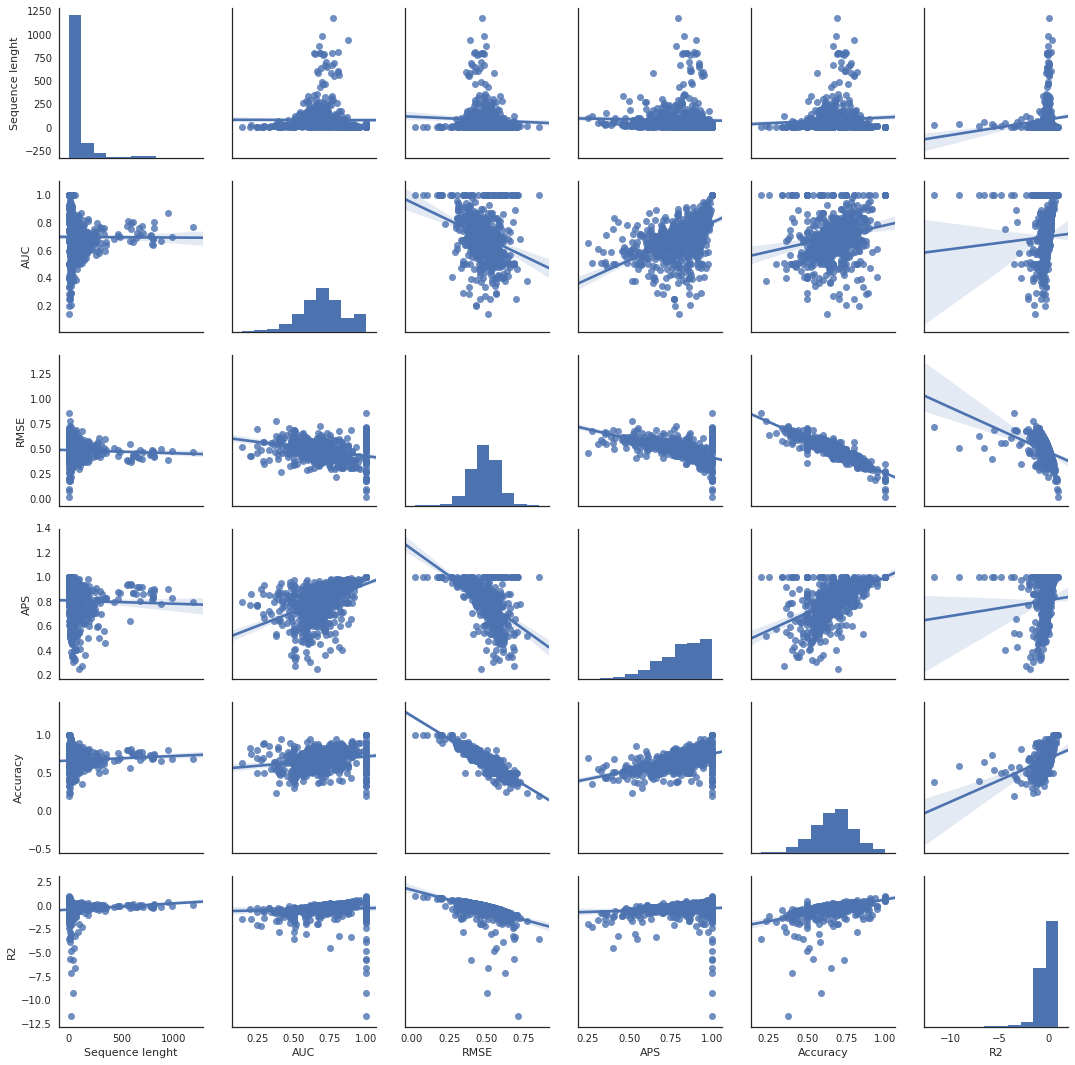

In [80]:
seaborn.pairplot(embedding_metrics[numpy.isfinite(embedding_metrics.AUC)], kind="reg")

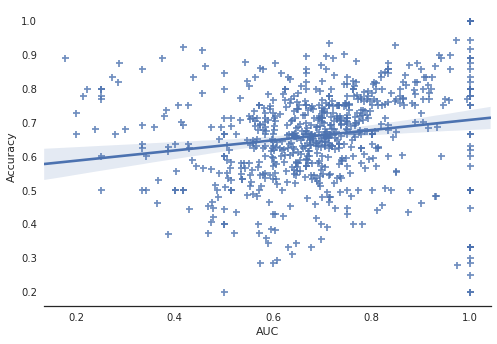

In [56]:
seaborn.regplot(x=embedding_metrics.AUC, y=embedding_metrics.Accuracy, marker="+")
seaborn.despine(left=True)

In [138]:
test_prediction_file = '/home/mteruel/edm/results/dkt_lstm/embeddings/predictions/test4/predictions.p'

with open(test_prediction_file, 'r') as prediction_file:
    true, predicted = pickle.load(prediction_file)

In [139]:
embedding_metrics = get_all_metrics(true, predicted)

116 sequences with only one class, ignoring.


In [140]:
embedding_metrics.describe()

,Sequence lenght,AUC,RMSE,APS,Accuracy,R2
count,800.000000,684.000000,800.000000,800.000000,800.000000,800.000000
mean,76.378750,0.679299,0.433110,0.839127,0.694538,-0.268894
std,159.096346,0.166399,0.139758,0.141409,0.156777,0.843659
min,1.000000,0.058824,0.000011,0.275591,0.200000,-13.684940
25%,9.000000,0.591498,0.397778,0.754409,0.600000,-0.353006
50%,20.000000,0.676142,0.464124,0.855330,0.672245,-0.093694
75%,64.250000,0.773253,0.514727,0.966657,0.777778,0.000000
max,1323.000000,1.000000,0.814888,1.000000,1.000000,0.989191


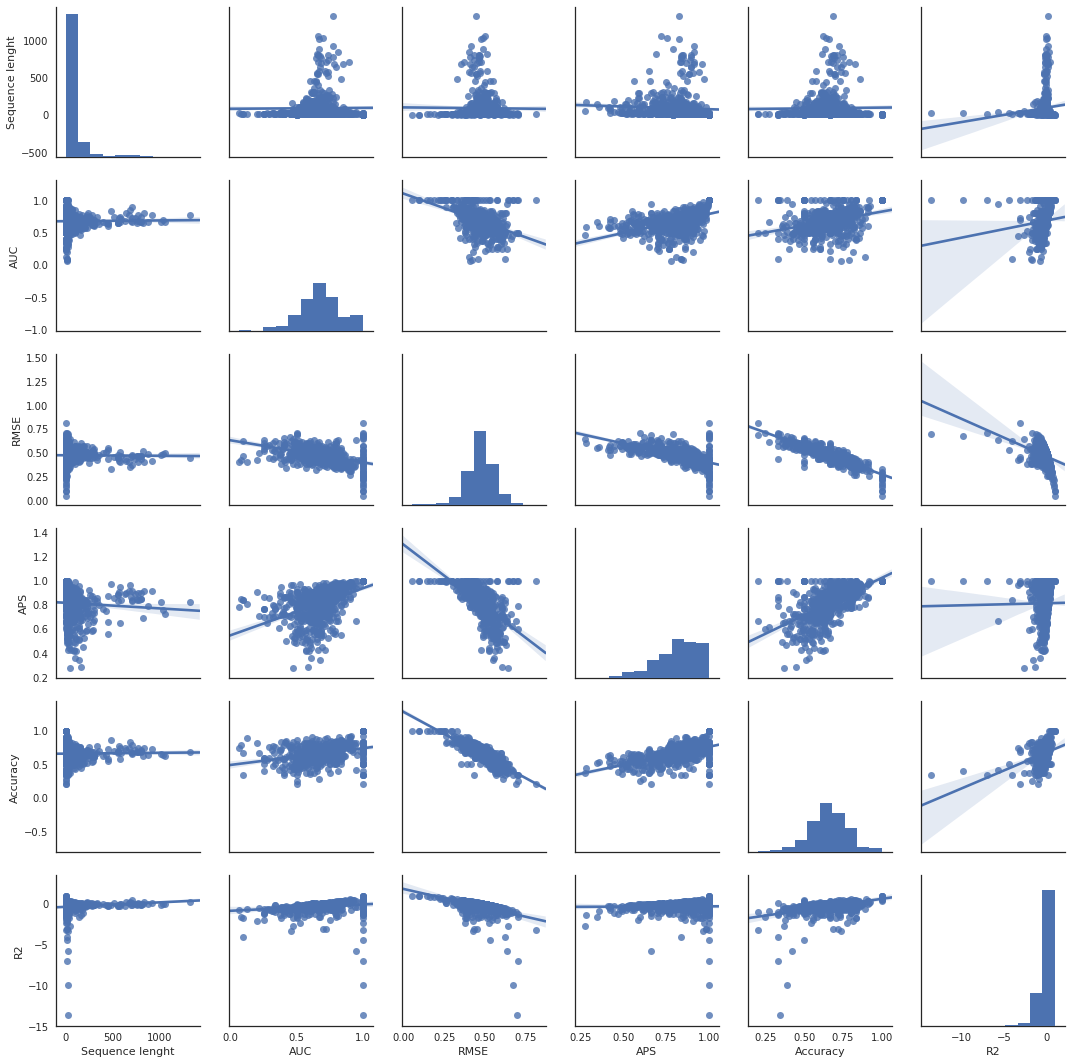

In [141]:
seaborn.pairplot(embedding_metrics[numpy.isfinite(embedding_metrics.AUC)], kind="reg")

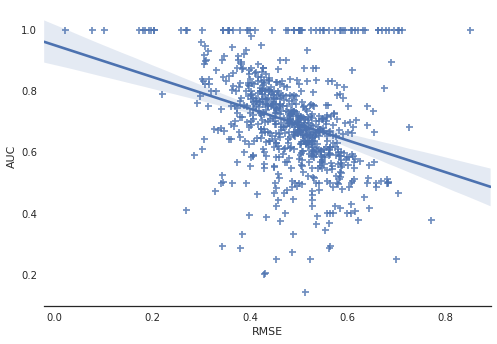

In [12]:
seaborn.regplot(x=embedding_metrics.RMSE, y=embedding_metrics.AUC, marker="+")
seaborn.despine(left=True)

In [144]:
metrics.mean_squared_error([3],[4.5])

2.25

# Metrics according to position in sequence

In [171]:
def get_all_position_metrics(true, predicted):
    """Gets average metrics according to position of the prediction in the sequence"""
    results = []
    for true_sequence, predicted_sequence in zip(true, predicted):
        for index, (true_label, predicted_label) in enumerate(zip(true_sequence, predicted_sequence)):
            results.append([index, abs(true_label - predicted_label), int(true_label == round(predicted_label))])
    return pandas.DataFrame(results, columns=['Sequence position', 'MAE', 'Accuracy'])

In [172]:
position_metrics = get_all_position_metrics(true, predicted)

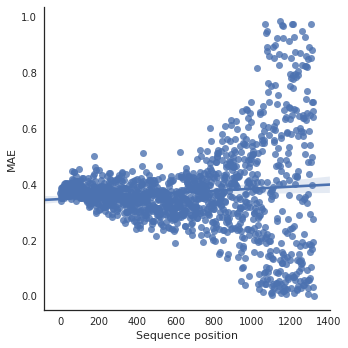

In [164]:
seaborn.lmplot(x='Sequence position', y='MAE', data=position_metrics.groupby('Sequence position').mean().reset_index())

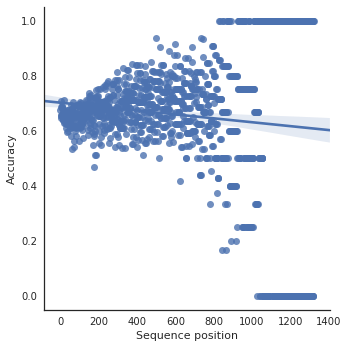

In [180]:
seaborn.lmplot(x='Sequence position', y='Accuracy', data=position_metrics.groupby('Sequence position').mean().reset_index())

In [196]:
def get_time_series_metrics(true, predicted):
    """Gets average metrics according to position of the prediction in the sequence"""
    results = []
    for sequence_index, (true_sequence, predicted_sequence) in enumerate(zip(true, predicted)):
        for index, (true_label, predicted_label) in enumerate(zip(true_sequence, predicted_sequence)):
            results.append([sequence_index, index, abs(true_label - predicted_label), int(true_label == round(predicted_label))])
    return pandas.DataFrame(results, columns=['Sequence', 'Time', 'MAE', 'Accuracy'])

In [199]:
time_series_metrics = get_time_series_metrics(true, predicted)

In [201]:
time_series_metrics[:20]

,Sequence,Time,MAE,Accuracy
0,0,0,0.096937,1
1,0,1,0.060708,1
2,0,2,0.011760,1
3,0,3,0.016215,1
4,0,4,0.614562,0
5,0,5,0.983609,0
6,0,6,0.849254,0
7,0,7,0.955141,0
8,0,8,0.034771,1
9,0,9,0.279300,1


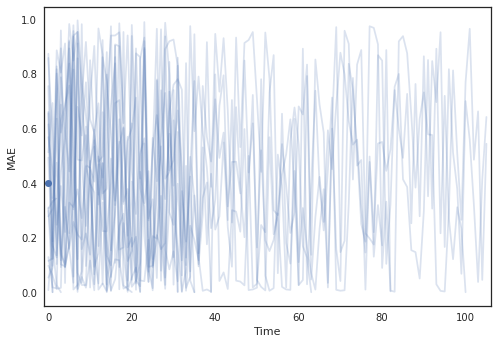

In [225]:
median_lenght = time_series_metrics.Time.median()
seaborn.tsplot(time="Time", value="MAE",
               unit="Sequence", data=time_series_metrics[time_series_metrics.Time < median_lenght][:1000],
               interpolate=False, err_style="unit_traces")

## Experiments with Co-embeddings